In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

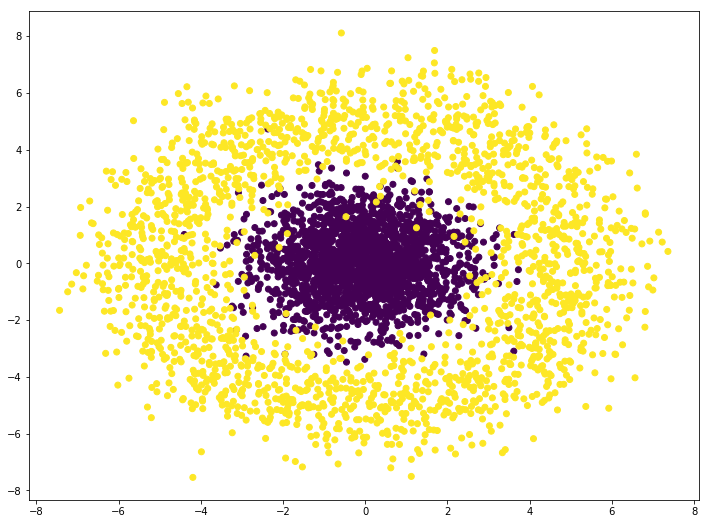

In [2]:
theta = np.linspace(0, 2*np.pi, 2000)

r1 = 1
r2 = 5

x11 = r1*np.cos(theta) + np.random.randn(2000)
x12 = r1*np.sin(theta) + np.random.randn(2000)
X1 = np.vstack((x11,x12)).T

x21 = r2*np.cos(theta) + np.random.randn(2000)
x22 = r2*np.sin(theta) + np.random.randn(2000)
X2 = np.vstack((x21,x22)).T

X = np.vstack((X1, X2))

y = np.array([0]*int(len(X)/2) + [1]*int(len(X)/2))

plt.figure(figsize = (12,9))
plt.scatter(X[:,0], X[:,1], c = y)

In [3]:
# Data Prep

PHI = np.vstack((np.ones(len(X)), X[:,0]**2, X[:,1]**2)).T

In [4]:
# Functions

def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y, p_hat):
    return -np.sum(y*np.log(p_hat) + (1 - y)*np.log(1 - p_hat))

def accuracy(y, p_hat):
    return np.mean(y == np.round(p_hat))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


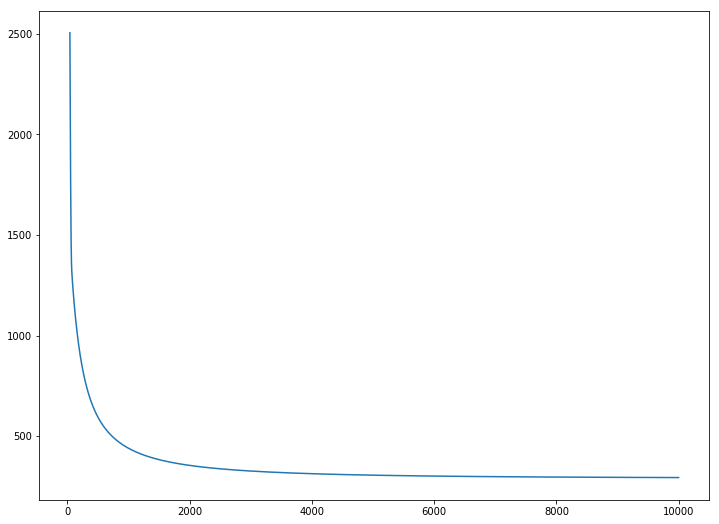

In [5]:
# Train the Model

w = np.random.randn(PHI.shape[1])

J = []
eta = 1e-5
epochs = int(1e4)

for t in range(epochs):
    p_hat = sigmoid(PHI.dot(w))
    J.append(cross_entropy(y,p_hat))
    w -= eta*PHI.T.dot(p_hat - y)
    
plt.figure(figsize = (12,9))
plt.plot(J)

In [6]:
# Report Accuracy

print("Accuracy: {}".format(accuracy(y,p_hat)))

Accuracy: 0.973


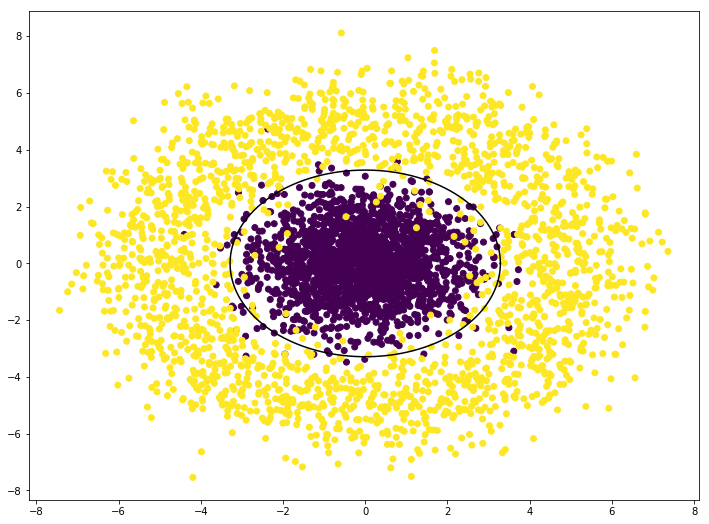

In [7]:
# Visualize the Learned Decision Boundary (Method 1)

r = np.sqrt(-w[0]/w[1])

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

plt.figure(figsize = (12,9))
plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(x1, x2, color = "black", linewidth = 1.5)

In [8]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def confusion_matrix(Y, Y_hat):
    return np.matmul(Y.T, Y_hat)

def precision(y, y_hat):
    return y.dot(y_hat)/y_hat.sum()

def recall(y, y_hat):
    return y.dot(y_hat)/y.sum()

def f_score(y, y_hat):
    p = precision(y, y_hat)
    r = recall(y, y_hat)
    return 2*p*r/(p + r)

def roc_auc(p_hat, y_hat, y, show_curve = False):
    roc_matrix = np.column_stack((p_hat, y_hat, y))
    roc_matrix = roc_matrix[roc_matrix[:,0].argsort()[::-1],:]
    
    tpr = np.cumsum(roc_matrix[:,1]*roc_matrix[:,2])/roc_matrix[:,2].sum()
    fpr = np.cumsum(roc_matrix[:,1]*(1 - roc_matrix[:,2]))/(1 - roc_matrix[:,2]).sum()
    
    tpr = np.array([0] + tpr.tolist() + [1])
    fpr = np.array([0] + fpr.tolist() + [1])
    
    if show_curve:
        plt.figure()
        plt.step(fpr, tpr)
        
    return tpr[1:].dot(np.diff(fpr))

In [9]:
thresh = 0.5

y_hat = (p_hat > thresh).astype(np.int32)

In [10]:
Y = one_hot_encode(y)
Y_hat = one_hot_encode(y_hat)
confusion_matrix(Y, Y_hat)

array([[1952.,   48.],
       [  60., 1940.]])

In [11]:
print("Precision: {:0.4f}".format(precision(y, y_hat)))

Precision: 0.9759


In [12]:
print("Recall: {:0.4f}".format(recall(y, y_hat)))

Recall: 0.9700


In [13]:
print("F-score: {:0.4f}".format(f_score(y, y_hat)))

F-score: 0.9729


ROC/AUC: 0.9981


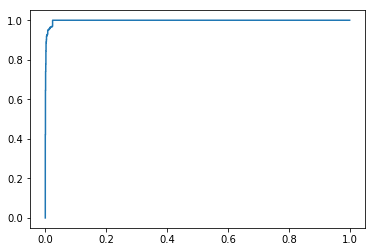

In [14]:
auc = roc_auc(p_hat, y_hat, y, show_curve = True)

print("ROC/AUC: {:0.4f}".format(auc))